In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('diabetes.csv')
df = df.replace({'tested_positive': 1, 'tested_negative': 0})
df = df.astype(float)

In [3]:
train_set, test_set = train_test_split(df.values, test_size=0.3, random_state=42)
x_train_set, y_train_set = train_set[:, 0:8], train_set[:, 8]
x_test_set, y_test_set = test_set[:, 0:8], test_set[:, 8]
x_train_set

array([[  1.   ,  95.   ,  60.   , ...,  23.9  ,   0.26 ,  22.   ],
       [  5.   , 105.   ,  72.   , ...,  36.9  ,   0.159,  28.   ],
       [  0.   , 135.   ,  68.   , ...,  42.3  ,   0.365,  24.   ],
       ...,
       [ 10.   , 101.   ,  86.   , ...,  45.6  ,   1.136,  38.   ],
       [  0.   , 141.   ,   0.   , ...,  42.4  ,   0.205,  29.   ],
       [  0.   , 125.   ,  96.   , ...,  22.5  ,   0.262,  21.   ]])

In [4]:
scaler = StandardScaler()
scaler.fit(x_train_set)
scaler.fit(x_test_set)

x_train_set, x_test_set = scaler.transform(x_train_set), scaler.transform(x_test_set)

In [5]:
feature_num = x_train_set.shape[1]
classes_num = 2

optimizer - adam, activation - relu

2023-04-03 15:59:14.791091: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-03 15:59:14.792098: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/100
17/17 [==============================] - 2s 20ms/step - loss: 0.6476 - accuracy: 0.6499 - val_loss: 0.6255 - val_accuracy: 0.6537
Epoch 2/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6371 - accuracy: 0.6499 - val_loss: 0.6163 - val_accuracy: 0.6537
Epoch 3/100
17/17 [==============================] - 0s 6ms/step - loss: 0.6266 - accuracy: 0.6499 - val_loss: 0.6083 - val_accuracy: 0.6537
Epoch 4/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6169 - accuracy: 0.6499 - val_loss: 0.6002 - val_accuracy: 0.6537
Epoch 5/100
17/17 [==============================] - 0s 8ms/step - loss: 0.6078 - accuracy: 0.6499 - val_loss: 0.5934 - val_accuracy: 0.6537
Epoch 6/100
17/17 [==============================] - 0s 8ms/step - loss: 0.5989 - accuracy: 0.6499 - val_loss: 0.5877 - val_accuracy: 0.6537
Epoch 7/100
17/17 [==============================] - 0s 6ms/step - loss: 0.5910 - accuracy: 0.6499 - val_loss: 0.5825 - val_accuracy: 0.6537
Epoch 8/100


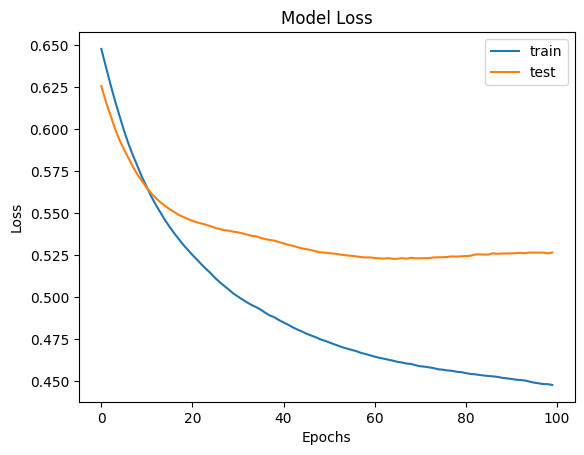

In [6]:
model = Sequential()
model.add(Dense(6, input_shape=(8,), activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train_set, y_train_set, epochs=100, batch_size=32, validation_data=(x_test_set, y_test_set))

test_loss, test_acc = model.evaluate(x_test_set, y_test_set)
print('Test accuracy:', test_acc)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

8/8 [==============================] - 0s 3ms/step


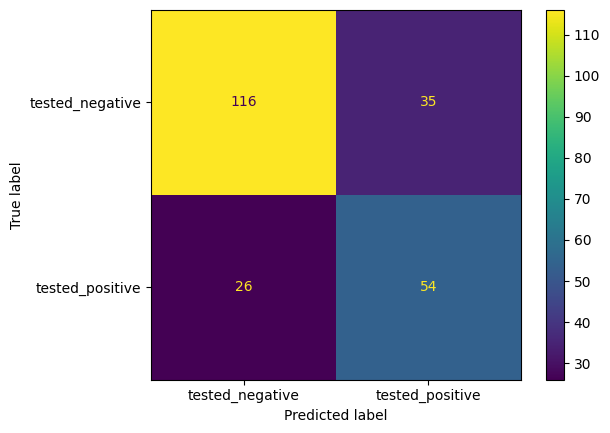

In [23]:
preds = model.predict(x_test_set)
cm = confusion_matrix(y_test_set, preds.round())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['tested_negative', 'tested_positive'])
disp.plot();

Tak, trenowanie powinno się przerwać w pewnym momencie aby uniknąć przuczenia. Generalnie, trenowanie powinno się przerwać w momencie w którym train loss i dev loss zaczynają się mocno rozchodzić (mogą się trochę różnić - tzw. 'generalization gap') albo dev loss zaczyna się zwiększać. \
W tym przypadku treonowanie warto przerwać około 20-25 epoki.

Optimizer - SDG, activation - Tanh

Epoch 1/100
17/17 [==============================] - 1s 24ms/step - loss: 0.9847 - accuracy: 0.4115 - val_loss: 0.8740 - val_accuracy: 0.4805
Epoch 2/100
17/17 [==============================] - 0s 8ms/step - loss: 0.8629 - accuracy: 0.4804 - val_loss: 0.7839 - val_accuracy: 0.5281
Epoch 3/100
17/17 [==============================] - 0s 8ms/step - loss: 0.7790 - accuracy: 0.5419 - val_loss: 0.7219 - val_accuracy: 0.5844
Epoch 4/100
17/17 [==============================] - 0s 11ms/step - loss: 0.7190 - accuracy: 0.5791 - val_loss: 0.6775 - val_accuracy: 0.6234
Epoch 5/100
17/17 [==============================] - 0s 8ms/step - loss: 0.6752 - accuracy: 0.6034 - val_loss: 0.6449 - val_accuracy: 0.6450
Epoch 6/100
17/17 [==============================] - 0s 9ms/step - loss: 0.6416 - accuracy: 0.6350 - val_loss: 0.6202 - val_accuracy: 0.6667
Epoch 7/100
17/17 [==============================] - 0s 9ms/step - loss: 0.6156 - accuracy: 0.6685 - val_loss: 0.6014 - val_accuracy: 0.6970
Epoch 8/100

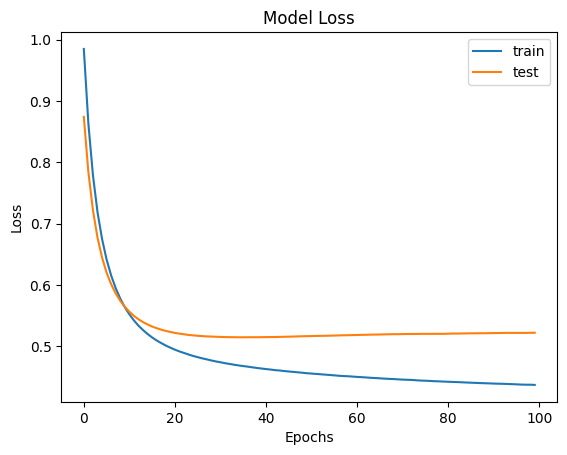

In [7]:
model = Sequential()
model.add(Dense(6, input_shape=(8,), activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = model.fit(x_train_set, y_train_set, epochs=100, batch_size=32, validation_data=(x_test_set, y_test_set))

test_loss, test_acc = model.evaluate(x_test_set, y_test_set)
print('Test accuracy:', test_acc)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

optimizer - sgd, activation - relu

Epoch 1/100
17/17 [==============================] - 2s 31ms/step - loss: 0.8130 - accuracy: 0.3706 - val_loss: 0.7766 - val_accuracy: 0.5022
Epoch 2/100
17/17 [==============================] - 0s 9ms/step - loss: 0.7562 - accuracy: 0.4730 - val_loss: 0.7337 - val_accuracy: 0.5714
Epoch 3/100
17/17 [==============================] - 0s 9ms/step - loss: 0.7210 - accuracy: 0.5531 - val_loss: 0.7058 - val_accuracy: 0.6190
Epoch 4/100
17/17 [==============================] - 0s 9ms/step - loss: 0.6979 - accuracy: 0.6089 - val_loss: 0.6870 - val_accuracy: 0.6537
Epoch 5/100
17/17 [==============================] - 0s 9ms/step - loss: 0.6816 - accuracy: 0.6406 - val_loss: 0.6725 - val_accuracy: 0.6667
Epoch 6/100
17/17 [==============================] - 0s 10ms/step - loss: 0.6683 - accuracy: 0.6648 - val_loss: 0.6610 - val_accuracy: 0.6970
Epoch 7/100
17/17 [==============================] - 0s 11ms/step - loss: 0.6577 - accuracy: 0.6872 - val_loss: 0.6515 - val_accuracy: 0.6970
Epoch 8/10

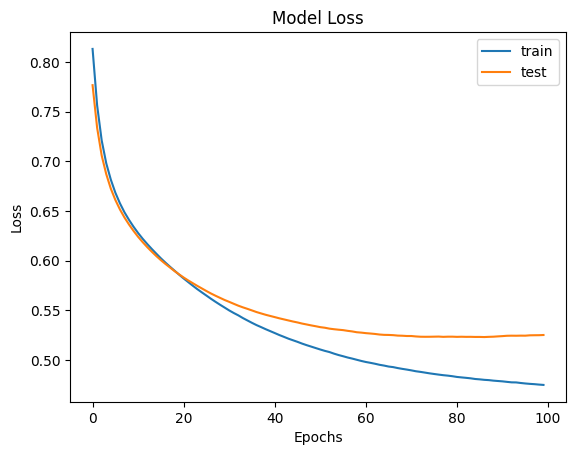

In [8]:
model = Sequential()
model.add(Dense(6, input_shape=(8,), activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = model.fit(x_train_set, y_train_set, epochs=100, batch_size=32, validation_data=(x_test_set, y_test_set))

test_loss, test_acc = model.evaluate(x_test_set, y_test_set)
print('Test accuracy:', test_acc)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

optimizer - adam, activation - leaky_relu 

Epoch 1/100
17/17 [==============================] - 1s 19ms/step - loss: 0.7640 - accuracy: 0.3482 - val_loss: 0.7498 - val_accuracy: 0.3506
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.7394 - accuracy: 0.3557 - val_loss: 0.7279 - val_accuracy: 0.4113
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.7181 - accuracy: 0.3892 - val_loss: 0.7107 - val_accuracy: 0.4416
Epoch 4/100
17/17 [==============================] - 0s 6ms/step - loss: 0.7017 - accuracy: 0.4413 - val_loss: 0.6952 - val_accuracy: 0.5281
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6861 - accuracy: 0.5214 - val_loss: 0.6828 - val_accuracy: 0.5931
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6740 - accuracy: 0.5885 - val_loss: 0.6709 - val_accuracy: 0.6234
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6621 - accuracy: 0.6350 - val_loss: 0.6604 - val_accuracy: 0.6623
Epoch 8/100


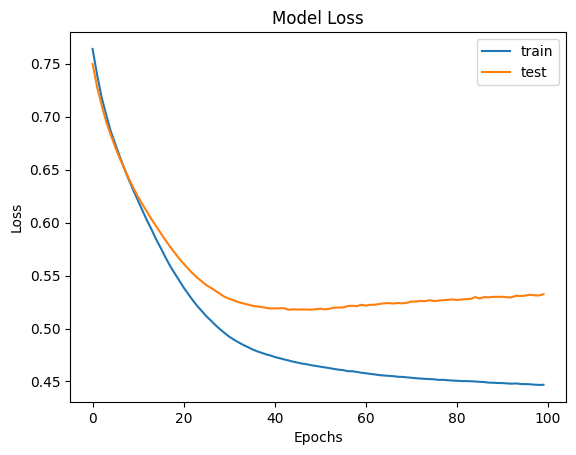

In [9]:
model = Sequential()
model.add(Dense(6, input_shape=(8,), activation='leaky_relu'))
model.add(Dense(3, activation='leaky_relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train_set, y_train_set, epochs=100, batch_size=32, validation_data=(x_test_set, y_test_set))

test_loss, test_acc = model.evaluate(x_test_set, y_test_set)
print('Test accuracy:', test_acc)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

optimizer - rmsprop, activation - leaky_relu

Epoch 1/100
17/17 [==============================] - 1s 24ms/step - loss: 0.6291 - accuracy: 0.6425 - val_loss: 0.6111 - val_accuracy: 0.6753
Epoch 2/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6014 - accuracy: 0.6760 - val_loss: 0.5901 - val_accuracy: 0.7143
Epoch 3/100
17/17 [==============================] - 0s 7ms/step - loss: 0.5820 - accuracy: 0.6927 - val_loss: 0.5726 - val_accuracy: 0.7186
Epoch 4/100
17/17 [==============================] - 0s 9ms/step - loss: 0.5668 - accuracy: 0.7058 - val_loss: 0.5596 - val_accuracy: 0.7229
Epoch 5/100
17/17 [==============================] - 0s 8ms/step - loss: 0.5552 - accuracy: 0.7188 - val_loss: 0.5506 - val_accuracy: 0.7403
Epoch 6/100
17/17 [==============================] - 0s 9ms/step - loss: 0.5451 - accuracy: 0.7374 - val_loss: 0.5419 - val_accuracy: 0.7403
Epoch 7/100
17/17 [==============================] - 0s 7ms/step - loss: 0.5365 - accuracy: 0.7356 - val_loss: 0.5346 - val_accuracy: 0.7576
Epoch 8/100


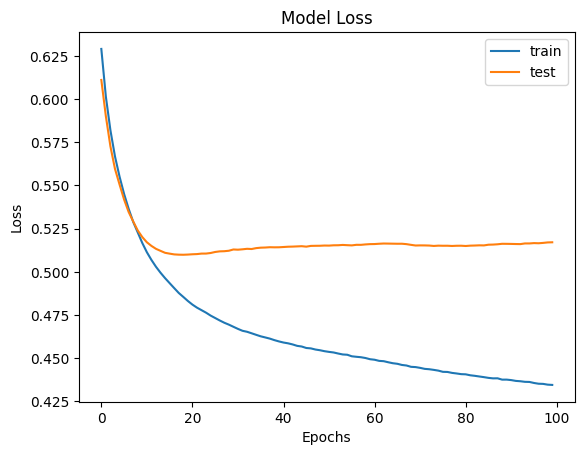

In [10]:
model = Sequential()
model.add(Dense(6, input_shape=(8,), activation='leaky_relu'))
model.add(Dense(3, activation='leaky_relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(x_train_set, y_train_set, epochs=100, batch_size=32, validation_data=(x_test_set, y_test_set))

test_loss, test_acc = model.evaluate(x_test_set, y_test_set)
print('Test accuracy:', test_acc)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

Wszystkie modele dały podobną dokładność, ale najlepszą dał zestaw parametrów: *leaky_relu* i *rmsprop*.

In [11]:
from ann_visualizer.visualize import ann_viz
ann_viz(model, view=True, filename='network.gv', title='MyNeural Network')